# A Youtube Analysis

In [2]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import string
import re 
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

We load the dataset

In [3]:
df = pd.read_csv('usvideos.csv')

In [385]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [386]:
df.shape

(40949, 16)

# Cleaning

### Converting Dummy Variables into Binary

In [433]:
df['comm_disabled_true'] = (df['comments_disabled'] == 'TRUE').astype(int)
df['ratings_disabled_true'] = (df['ratings_disabled'] == 'TRUE').astype(int)
df['vid_error_removed_true'] = (df['video_error_or_removed'] == 'TRUE').astype(int)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


### Converting Trending Date to date_time

In [420]:
df['cleaned_trending_date'] = pd.to_datetime(df.trending_date, format = '%y.%d.%m')

### Converting publish_time Date to date_time

In [421]:
df['cleaned_publish_time'] = pd.to_datetime(df.publish_time, format = '%Y-%m-%dT%H:%M:%S.%fZ')

### Title Length

In [422]:
df['title_length'] = df.title.apply(lambda x: len(str(x).split()))

In [423]:
df[df.video_id == 'VYOjWnS4cMY']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,brackett_views,cleaned_trending_date,cleaned_publish_time,title_length
33351,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405355,51547,149473,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,5,2018-05-08,2018-05-06 04:00:07,8
33557,VYOjWnS4cMY,18.09.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",47169016,1841540,79717,194822,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,5,2018-05-09,2018-05-06 04:00:07,8
33772,VYOjWnS4cMY,18.10.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",60776509,2183732,104377,232723,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,5,2018-05-10,2018-05-06 04:00:07,8
33983,VYOjWnS4cMY,18.11.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",73432600,2478904,124290,263984,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,5,2018-05-11,2018-05-06 04:00:07,8
34202,VYOjWnS4cMY,18.12.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",85092067,2735961,140711,289682,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,5,2018-05-12,2018-05-06 04:00:07,8
34420,VYOjWnS4cMY,18.13.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",98938809,3037293,161812,319502,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,5,2018-05-13,2018-05-06 04:00:07,8
34850,VYOjWnS4cMY,18.15.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",116581406,3388289,186591,354187,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,6,2018-05-15,2018-05-06 04:00:07,8
35057,VYOjWnS4cMY,18.16.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",126191952,3587455,205995,377394,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,6,2018-05-16,2018-05-06 04:00:07,8
35265,VYOjWnS4cMY,18.17.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",134839555,3749810,226641,398351,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,6,2018-05-17,2018-05-06 04:00:07,8
35474,VYOjWnS4cMY,18.18.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",142421830,3885070,241386,414109,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,6,2018-05-18,2018-05-06 04:00:07,8


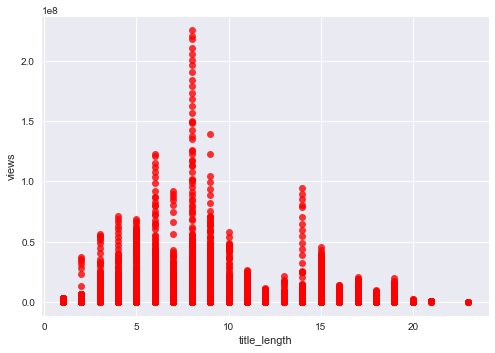

In [515]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
ax = sns.regplot(x="title_length", y="views", data=df,color = 'red',fit_reg= False)
plt.show()

### Time Elapsed (in Days) between publication and trending Date

In [424]:
#elapsed_time_to_trending
duration = df.cleaned_trending_date - df.cleaned_publish_time
df['elapsed_time_to_trending_days'] = duration.dt.days

There's an observation screwing up everything so i remove it.

In [425]:
df.elapsed_time_to_trending_days

0           0
1           0
2           1
3           0
4           1
5           0
6           1
7           1
8           0
9           0
10          0
11          0
12          0
13          1
14          1
15          0
16          1
17          0
18          0
19          1
20          0
21          1
22          0
23          1
24          0
25          1
26          0
27          0
28          0
29       2360
         ... 
40919      20
40920      21
40921      20
40922      20
40923      21
40924      21
40925      23
40926      22
40927      22
40928      22
40929      22
40930      22
40931      23
40932      22
40933      24
40934      24
40935      24
40936      24
40937      25
40938      26
40939      26
40940      26
40941      26
40942      26
40943      26
40944      26
40945      26
40946      26
40947      27
40948      27
Name: elapsed_time_to_trending_days, Length: 40949, dtype: int64

In [426]:
df.iloc[29]

video_id                                                               n30k5CwLhS4
trending_date                                                             17.14.11
title                                                      Nick Andopolis: Drummer
channel_title                                                       FaeryInLoveInc
category_id                                                                      1
publish_time                                              2011-05-29T17:03:12.000Z
tags                             freaks and geeks|"jason segel"|"judd apatow"|"...
views                                                                        50867
likes                                                                          715
dislikes                                                                       238
comment_count                                                                  246
thumbnail_link                      https://i.ytimg.com/vi/n30k5CwLhS4/default.jpg
comm

In [427]:
df_fil = df[df.video_id != 'n30k5CwLhS4']

In [428]:
#sns.distplot(df_fil.elapsed_time_to_trending_days, color= 'red', kde= False, rug = False)
#plt.show()

In [429]:
sum(df_fil.elapsed_time_to_trending_days >2000)

75

#### Distribution Plot of Time to Trending

### Hour of Publication

In [430]:
#alternative lambda function: df.cleaned_publish_time.apply(lambda x: x.hour)

df.cleaned_publish_time = pd.to_datetime(df.cleaned_publish_time)
df['hour_of_publication'] = df.cleaned_publish_time.dt.hour

#### Distribution Plot of Hour of Publication

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


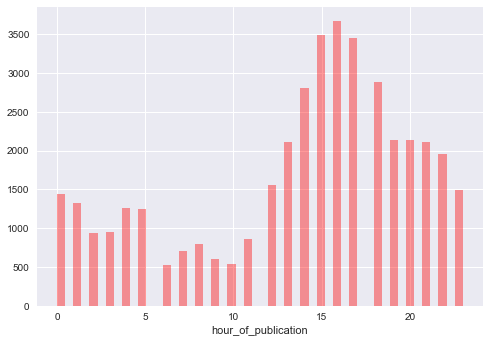

In [431]:
#plotting distribution of when most videos are uploaded
sns.distplot(df.hour_of_publication, color= 'red', kde= False, rug = False)
plt.show()

## Focus: Category id

Each Video Category in YouTube as a corresponding ID number.

Below we count how many videos we have per each category.

In [42]:
df.category_id.value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

Below I plot the Count per each Video Category.

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


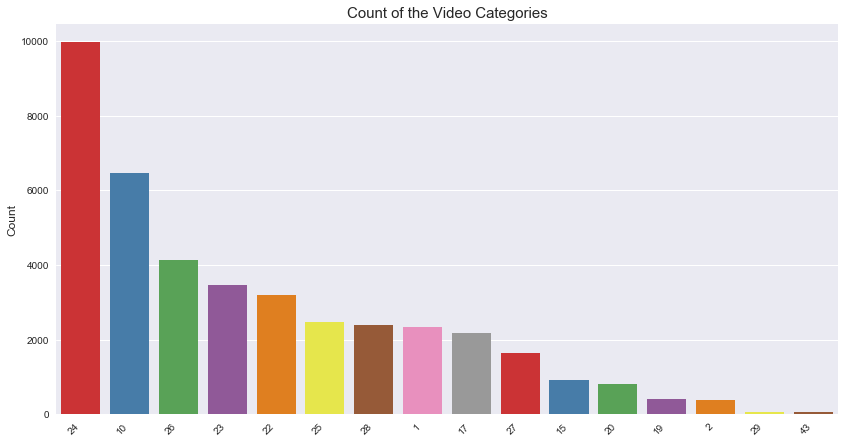

In [132]:
plt.figure(figsize = (14,7))
g = sns.countplot('category_id', data = df, palette="Set1", order = df['category_id'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Count of the Video Categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

We see that Entertainment (category_id == 24) is the most trending category in this dataset. 

Hence we decide to focuse only on this portion of the analysis for the first part of our analysis, by filtering out these category's entries.

In [159]:
df['title_length'] = df.title.apply(lambda x: len(str(x).split()))

## Distribution of Likes

In the following plot we analyze the number of Views (normalized using log) is distributed per each category. Category 1 and 10 have the heighest medians, while categories 25 and 29 have the lowest.

(THE SAME COULD BE DONE FOR LIKES and DISLIKES and COMMENTS)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


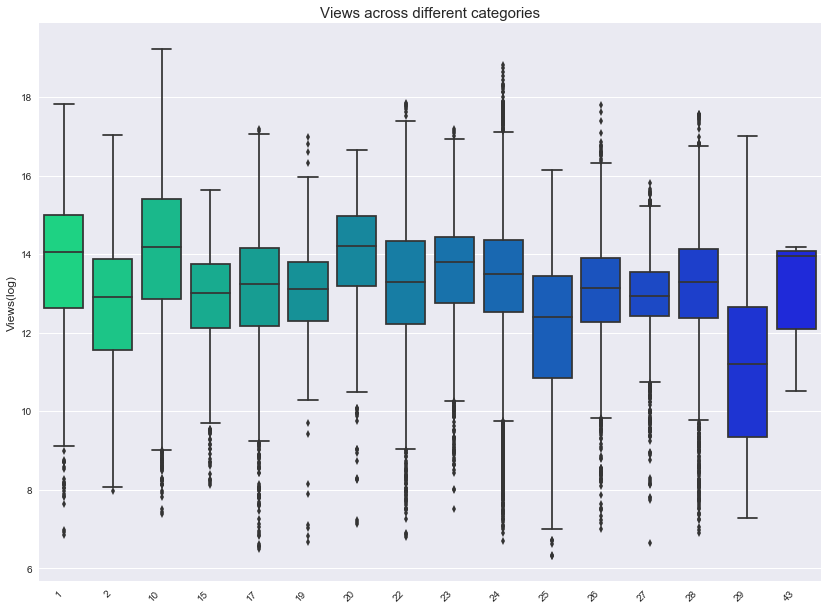

In [135]:
plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_id', y = np.log(df['views'] +1), data = df, palette="winter_r")
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Views across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Views(log)", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

## Entertainment DataSet

In [4]:
df_education = df[df.category_id == 27]

In [54]:
df_entertainment.shape

(9964, 16)

# Word Clouds

The following section will be dedicated to the development of Word Clouds for the Videos' Title,  Title Descriptions, and Tags.

Most of the code was taken from the following source: https://medium.com/@tanmayee92/visualizing-youtube-videos-using-seaborn-and-wordcloud-in-python-b24247f70228

## WC - Titles

In [5]:
df_education.title

17       How does your body know you're full? - Hilary ...
19                Founding An Inbreeding-Free Space Colony
20                        How Can You Control Your Dreams?
22       Is It Dangerous To Talk To A Camera While Driv...
90                          2017 Champions Showdown: Day 3
                               ...                        
40728    8 Survival Myths That Will Definitely Make Thi...
40810    How one scientist averted a national health cr...
40871    Why this skateboarding trick should be IMPOSSI...
40926                                                  435
40933    8 Survival Myths That Will Definitely Make Thi...
Name: title, Length: 1656, dtype: object

We now the 2010s were the decade of the never ending "challenges" as we can see that this word has a strong presence in many of the entertainment videos' titles. Even more popular than challenges are trailers (possibly from netflix movies and tv series) and REACT-ions, which as millenials well-know are part of everyday life for VLOGgers.

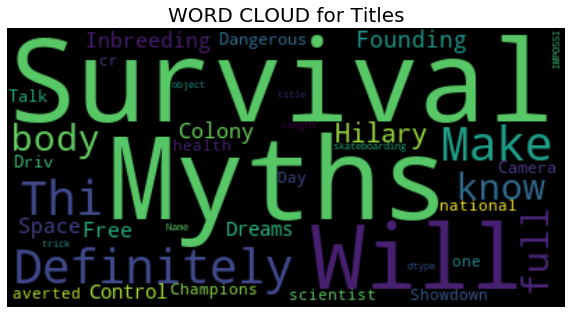

In [6]:
plt.figure(figsize = (10,20))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords = stopwords,
                      max_words = 80,
                      max_font_size = 100,
                      random_state = 42
                    ).generate(str(df_education['title']))

#Plotting the word cloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("WORD CLOUD for Titles", fontsize = 20)
plt.axis('off')
plt.show()

## WC - Title Descriptions

In [8]:
df_education.description

17       Check out our Patreon page: https://www.patreo...
19       Thanks to 23AndMe for supporting SciShow. Thes...
20       What if there was a way to control your dreams...
22       I'm visiting the University of Iowa's National...
90       The Saint Louis Chess Club hosts a series of f...
                               ...                        
40728    You might think you know how to survive if you...
40810    TED wants to promote student ideas! Learn more...
40871    Skateboarding legend Rodney Mullen teams up wi...
40926    a random song laying around from the flower bo...
40933    You might think you know how to survive if you...
Name: description, Length: 1656, dtype: object

Looking at the most popular words for Title Descriptions, we find common and uncommon words. The WordCloud seem to indicate that the Viral Video Game Fortnite has a strong presence in the entertainment videos dataset. 'Back' and 'Time' are also word often present in the videos' descriptions.

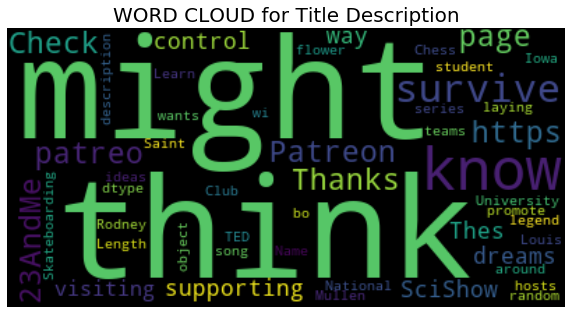

In [11]:
plt.figure(figsize = (10,10))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords = stopwords,
                      max_words = 80,
                      max_font_size = 100,
                      random_state = 42
                    ).generate(str(df_education['description']))

plt.imshow(wordcloud, interpolation="bilinear")
plt.title('WORD CLOUD for Title Description', fontsize = 20)
plt.axis('off')
plt.show()

## WC - Tags

Analyzing Entertainment Videos' Tags we quickly understand that show and nightly shows, dominate in this category of Videos. The Word Cloud helps us identify that "Late", "Show", "SNL" and "Graham Norton" are the most common tags found in this category. As we know many youtube customers enjoy watching "Funny" clips of late nights shows like Jimmy Fallon, Jimmy Kimmel, Trevor Noah or Graham Norton. 

Our Word Cloud confirms our beliefs that these are the most popular and trendy shows at the moment. 

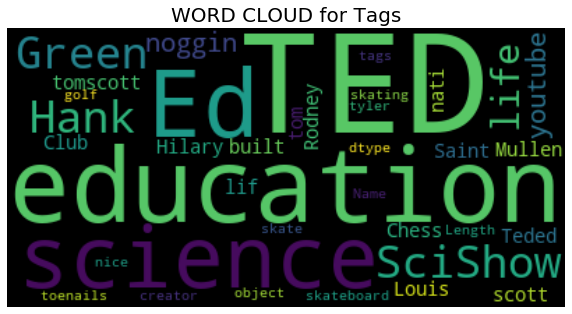

In [9]:
plt.figure(figsize = (10,10))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords = stopwords,
                      max_words = 100,
                      max_font_size = 100,
                      random_state = 42
                    ).generate(str(df_education['tags']))

plt.imshow(wordcloud, interpolation="bilinear")
plt.title('WORD CLOUD for Tags', fontsize = 20)
plt.axis('off')
plt.show()

## Prediction of Views (Failed Attempt for Now)

In [494]:
df_entertainment['comm_disabled_true'] = (df_entertainment['comments_disabled'] == 'TRUE').astype(int)
df_entertainment['ratings_disabled_true'] = (df_entertainment['ratings_disabled'] == 'TRUE').astype(int)
df_entertainment['vid_error_removed_true'] = (df_entertainment['video_error_or_removed'] == 'TRUE').astype(int)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import ker

In [495]:
df_entertainment.drop(['comments_disabled','ratings_disabled','video_error_or_removed'], axis = 1 )

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,description,brackett_views,cleaned_trending_date,cleaned_publish_time,title_length,elapsed_time_to_trending_days,hour_of_publication,comm_disabled_true,ratings_disabled_true,vid_error_removed_true
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,"One year after the presidential election, John...",3,2017-11-14,2017-11-13 07:30:00,10,0,7,0,0,0
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,Today we find out if Link is a Nickelback amat...,2,2017-11-14,2017-11-13 11:00:04,5,0,11,0,0,0
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,I know it's been a while since we did this sho...,3,2017-11-14,2017-11-12 18:01:41,5,1,18,0,0,0
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,...,Embattled Alabama Senate candidate Roy Moore (...,3,2017-11-14,2017-11-12 05:37:17,9,1,5,0,0,0
11,VifQlJit6A0,17.14.11,(SPOILERS) 'Shiva Saves the Day' Talked About ...,amc,24,2017-11-13T03:00:00.000Z,"The Walking Dead|""shiva""|""tiger""|""king ezekiel...",104578,1576,303,...,Shiva arrives just in time as King Ezekiel att...,2,2017-11-14,2017-11-13 03:00:00,14,0,3,0,0,0
25,dRpNZV18N_g,17.14.11,SPAGHETTI BURRITO VS SPAGHETTI BURRITO,HellthyJunkFood,24,2017-11-12T14:00:04.000Z,"spaghetti burrito|""diy burrito""|""spaghetti""|""b...",223077,8676,193,...,Visit http://www.Bongiovibrand.com\nand get 20...,2,2017-11-14,2017-11-12 14:00:04,5,1,14,0,0,0
31,CBVGjS_EJok,17.14.11,Amazon Christmas Advert 2017 - Toys & Games,Amazon.co.uk,24,2017-11-06T17:52:50.000Z,"Amazon|""Amazon Christmas""|""Amazon Xmas""|""Chris...",26000,119,69,...,Shhhh. See how Amazon helps Dad create a magic...,1,2017-11-14,2017-11-06 17:52:50,8,7,17,0,0,0
33,hz7ukDjuq4w,17.14.11,What's Inside a Detectives Car?,officer401,24,2017-11-12T23:41:37.000Z,"detective|""officer""|""401""|""officer401""|""police...",67661,3781,84,...,Intro Song: Dion Timmer - Lost\nEnding Song: S...,1,2017-11-14,2017-11-12 23:41:37,5,1,23,0,0,0
46,ogYum4kWXgk,17.14.11,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13T13:00:06.000Z,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,...,Pets are Awesome! This is for all the animal l...,1,2017-11-14,2017-11-13 13:00:06,11,0,13,0,0,0
49,DM-ni_LSOFE,17.14.11,"ELDERS REACT TO iPHONE X (Facial Recognition, ...",FBE,24,2017-11-10T23:05:25.000Z,"iPhone X|""animojis""|""facial recognition""|""ELDE...",2045386,45406,2842,...,"iPhoneX (Facial Recognition, Animojis) reacted...",3,2017-11-14,2017-11-10 23:05:25,8,3,23,0,0,0


# Linear Regression

In [316]:
from sklearn.model_selection import train_test_split

In [343]:
y = df.views
X = df[['hour_of_publication', 'title_length', 'comm_disabled_true','ratings_disabled_true']]

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [345]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [346]:
from sklearn import metrics


def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', metrics.r2_score(y_test, y_pred))

MAE: 2740546.1747827274
MAPE: 2552.522811208264
MSE: 48271385309086.27
RMSE: 6947761.1724271495
R Squared: 0.005971232775820345


## Create Ranges

In [461]:
df.describe()

,category_id,views,likes,dislikes,comment_count,brackett_views,title_length,elapsed_time_to_trending_days,hour_of_publication,comm_disabled_true,ratings_disabled_true,vid_error_removed_true
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.0,40949.0,40949.0
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,3.294806,8.519060,15.811253,13.766685,0.0,0.0,0.0
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,0.801988,3.502857,146.014236,6.424996,0.0,0.0,0.0
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,-1.000000,0.000000,0.0,0.0,0.0
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,3.000000,6.000000,2.000000,10.000000,0.0,0.0,0.0
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,3.000000,8.000000,4.000000,15.000000,0.0,0.0,0.0
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,4.000000,11.000000,8.000000,18.000000,0.0,0.0,0.0
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,6.000000,23.000000,4214.000000,23.000000,0.0,0.0,0.0


In [474]:
def brackett_views(x):
    if(x['views'] < pow(10,5)): return 1
    elif(x['views'] < pow(10,6)): return 2
    elif(x['views'] >  pow(10,6)): return 3
    
df['brackett_views'] = df.apply(brackett_views, axis=1)

In [475]:
y = df.brackett_views
X = df[['hour_of_publication', 'title_length', 'comm_disabled_true','ratings_disabled_true']]

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [477]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [478]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,y_pred))
print("Score:",round(accuracy_score(y_test,y_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_pred))

Confusion Matrix for Gradient Boosting Classifier:
[[ 139 1380  667]
 [  98 5568 2008]
 [  82 3479 2959]]
Score: 52.91
Classification Report:
              precision    recall  f1-score   support

           1       0.44      0.06      0.11      2186
           2       0.53      0.73      0.62      7674
           3       0.53      0.45      0.49      6520

   micro avg       0.53      0.53      0.53     16380
   macro avg       0.50      0.41      0.40     16380
weighted avg       0.52      0.53      0.50     16380



# Other Classifier

### XG Boost - Not Good

In [483]:
from sklearn.ensemble import GradientBoostingClassifier
gbi = GradientBoostingClassifier(random_state = 3540)
gbi.fit(X_train,y_train)
predgbi = gbi.predict(X_test)

In [484]:
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
print("Classification Report:")
print(classification_report(y_test,predgbi))

Confusion Matrix for Gradient Boosting Classifier:
[[   5 1723  458]
 [   0 6121 1553]
 [   0 4461 2059]]
Score: 49.97
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      2186
           2       0.50      0.80      0.61      7674
           3       0.51      0.32      0.39      6520

   micro avg       0.50      0.50      0.50     16380
   macro avg       0.67      0.37      0.34     16380
weighted avg       0.57      0.50      0.44     16380



### MLP Classifier

In [487]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

In [488]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print("Score:",round(accuracy_score(y_test,preds)*100,2))
print(classification_report(y_test, preds))

[[   0 1897  289]
 [   0 6509 1165]
 [   0 5377 1143]]
Score: 46.72
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2186
           2       0.47      0.85      0.61      7674
           3       0.44      0.18      0.25      6520

   micro avg       0.47      0.47      0.47     16380
   macro avg       0.30      0.34      0.29     16380
weighted avg       0.40      0.47      0.38     16380



/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Random Forest Classifier

In [489]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(X_train,y_train)
predrmfr = rmfr.predict(X_test)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [490]:
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 125 1350  711]
 [  81 5501 2092]
 [  72 3391 3057]]
Score: 53.01
Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.06      0.10      2186
           2       0.54      0.72      0.61      7674
           3       0.52      0.47      0.49      6520

   micro avg       0.53      0.53      0.53     16380
   macro avg       0.50      0.41      0.40     16380
weighted avg       0.52      0.53      0.50     16380



## Classification only on entertainment Category

In [496]:
df_entertainment['brackett_views'] = df_entertainment.apply(brackett_views, axis=1)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [497]:
y = df_entertainment.brackett_views
X = df_entertainment[['hour_of_publication', 'title_length', 'comm_disabled_true','ratings_disabled_true']]

In [498]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

## Classifcation Tree

In [499]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [500]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,y_pred))
print("Score:",round(accuracy_score(y_test,y_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_pred))

Confusion Matrix for Gradient Boosting Classifier:
[[  86  265  130]
 [  60 1392  394]
 [  36  713  910]]
Score: 59.91
Classification Report:
              precision    recall  f1-score   support

           1       0.47      0.18      0.26       481
           2       0.59      0.75      0.66      1846
           3       0.63      0.55      0.59      1659

   micro avg       0.60      0.60      0.60      3986
   macro avg       0.56      0.49      0.50      3986
weighted avg       0.59      0.60      0.58      3986



## Random Forest Classifier

In [501]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(X_train,y_train)
predrmfr = rmfr.predict(X_test)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [502]:
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[  73  260  148]
 [  55 1375  416]
 [  33  681  945]]
Score: 60.04
Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.15      0.23       481
           2       0.59      0.74      0.66      1846
           3       0.63      0.57      0.60      1659

   micro avg       0.60      0.60      0.60      3986
   macro avg       0.56      0.49      0.49      3986
weighted avg       0.59      0.60      0.58      3986



## Get Top 5 of Stuff

In [290]:
def print_top5(column_of_interest,column_stats):
    df_new = df.groupby(column_of_interest)['views', 'likes','comment_count', 'dislikes','title_length'].apply(lambda x: x.astype(int).sum())
    return df_new.sort_values(by=column_stats, ascending=False).head()

In [291]:
print_top5('title','views')

,views,likes,comment_count,dislikes,title_length
title,,,,,
Childish Gambino - This Is America (Official Video),3758488765,96700818,10151289,6054434,200
Ariana Grande - No Tears Left To Cry,1529291326,49451353,4143608,1877988,160
BTS (방탄소년단) 'FAKE LOVE' Official MV,1283188291,71835050,15568561,2389776,84
"Becky G, Natti Natasha - Sin Pijama (Official Video)",1182971286,19185287,1176862,1616616,180
VENOM - Official Trailer (HD),1003151226,23339807,2533352,831784,95
